In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 3688.03it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# city_sub_order_route_dict

In [20]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [21]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [22]:
# city_sub_order_route_dict

In [23]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [24]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [25]:
# city_sub_all_shortest_paths_id_dict

In [26]:
# city_sub_edges

In [27]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [28]:
# city_sub_ordered_edges

In [29]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [30]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

In [31]:
# city_sub_shortest_path_pairs_dict

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [32]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [33]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [34]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [35]:
city_sub_extended_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


### Organize edges dataframe for baseline network--city_sub_new_edges

In [36]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [37]:
# city_sub_shortest_path_edges_df

In [38]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [39]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
632,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
633,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
634,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [40]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [41]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [42]:
# city_sub_shortest_path_nodes_id

In [43]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [44]:
city_sub_new_nodes

,id,geometry,degree
0,1,POINT (4.9232197 52.3339159),2
1,2,POINT (4.9642294 52.2945339),2
2,4,POINT (4.9622901 52.2955678),2
3,7,POINT (4.8471439 52.3952143),2
4,492,POINT (4.8457805 52.395217),3
...,...,...,...
633,805,POINT (4.8505958 52.3951031),2
634,323,POINT (4.989299 52.2962711),2
635,180,POINT (4.8772326 52.3393181),3
636,728,POINT (4.9010471 52.3775081),2


### Add columns to stations--city_sub_new_staions

In [45]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [46]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [47]:
city_sub_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,328,POINT (4.98916 52.29641),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,855,POINT (4.97400 52.29564),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,854,POINT (4.96013 52.29813),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,810,POINT (4.95213 52.30687),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,809,POINT (4.94762 52.31181),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (4.96734 52.32837),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,823,POINT (4.95669 52.33041),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,829,POINT (4.94628 52.32683),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


# Tram-Amsterdam

## Generate Baseline Networks

In [48]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 3677.62it/s]


Calculate_degree possibly unhappy


In [49]:
# city_tram_stations

In [50]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [51]:
id_nodes_length_tram

1920

In [52]:
id_edges_length_tram 

2204

In [53]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [54]:
# city_tram_edges

In [55]:
# city_tram_nodes

In [56]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_new_edges_length_sub = city_sub_new_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_new_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [57]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time','weights']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [58]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [59]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)
city_tram_edges = city_tram_edges.reset_index(drop = True)

In [60]:
# city_tram_edges

In [61]:
# city_tram_nodes

In [62]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [63]:
# city_tram_stations

In [64]:
# city_tram_routes

In [65]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [66]:
# city_tram_order_id_pairs

In [67]:
# city_tram_all_shortest_paths_id_dict

In [68]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [69]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [70]:
# duplicated_rows

In [71]:
len(duplicated_rows)

72

In [72]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [73]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [74]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [75]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [76]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [77]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [78]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [79]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [80]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [81]:
# city_tram_shortest_path_edges_df

In [82]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [83]:
# city_tram_new_edges

In [84]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_new_edges0506.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [85]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [86]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [87]:
# city_tram_shortest_path_nodes_id

In [88]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [89]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [90]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [91]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [92]:
# city_tram_new_stations

# Build network with straight lines in oneway

In [93]:
city_sub_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,328,POINT (4.98916 52.29641),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,855,POINT (4.97400 52.29564),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,854,POINT (4.96013 52.29813),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,810,POINT (4.95213 52.30687),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,809,POINT (4.94762 52.31181),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (4.96734 52.32837),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,823,POINT (4.95669 52.33041),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,829,POINT (4.94628 52.32683),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


In [94]:
city_sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

In [95]:
city_sub_new_nodes.sort_values(by='id')

,id,geometry,degree
203,0,POINT (4.9236699 52.3361909),2
0,1,POINT (4.9232197 52.3339159),2
1,2,POINT (4.9642294 52.2945339),2
400,3,POINT (4.9673168 52.2943931),2
2,4,POINT (4.9622901 52.2955678),2
...,...,...,...
569,863,POINT (4.8906476 52.3539585),2
571,864,POINT (4.8906487 52.3539577),2
561,865,POINT (4.8927726 52.3704434),2
539,866,POINT (4.9010846 52.371353),2


In [96]:
city_tram_new_nodes.sort_values(by='id')

,id,geometry,degree
0,868,POINT (4.9324018 52.3610615),3
1289,869,POINT (4.9321097 52.361227),3
1,872,POINT (4.9337809 52.3611734),3
753,873,POINT (4.9394435 52.3615916),3
2,874,POINT (4.9394 52.361617),3
...,...,...,...
1440,2778,POINT (4.9009723 52.3777976),2
1447,2779,POINT (4.8987647 52.3785952),2
1448,2780,POINT (4.8988204 52.3786244),2
220,2784,POINT (4.890644 52.3719008),2


In [97]:
city_sub_edges.sort_values(by='id')

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [98]:
city_tram_edges.sort_values(by='id')

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,962,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,963,870,871,146.082551,0.010434,146,"(871, 870)","(870, 871)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,964,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,965,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,966,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3161,2364,1462,11.280287,0.000806,11,"(1462, 2364)","(2364, 1462)"
2186,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3162,1430,1940,12.010525,0.000858,12,"(1940, 1430)","(1430, 1940)"
2187,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3163,2365,1429,81.765515,0.005840,81,"(1429, 2365)","(2365, 1429)"
2188,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3164,1434,1947,12.587379,0.000899,12,"(1947, 1434)","(1434, 1947)"


In [101]:
def new_half_order_route_dict(city_sub_order_route_dict, city_sub_new_stations):
    city_sub_new_half_order_route_dict = {}
    for i, (key, df) in enumerate(city_sub_order_route_dict.items()):
        if i % 2 == 0:  
            new_df = df[['geometry']]
            new_df = pd.merge(new_df, city_sub_new_stations, on='geometry', how='left')
            city_sub_new_half_order_route_dict[key] = new_df

    return city_sub_new_half_order_route_dict

In [102]:
def new_half_stations_straight_line_df(city_sub_new_half_order_route_dict):
    city_sub_new_half_stations_straight_line_df = pd.DataFrame()
    for key,df in city_sub_new_half_order_route_dict.items():
        city_sub_new_half_stations_straight_line_df = pd.concat([city_sub_new_half_stations_straight_line_df,df])
    city_sub_new_half_stations_straight_line_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
    city_sub_new_half_stations_straight_line_df.reset_index(inplace=True,drop=True)
    return city_sub_new_half_stations_straight_line_df

In [103]:
def new_edges_straight_line_df(city_sub_new_order_route_dict, average_speed):
    city_sub_new_edges_straight_line_df = pd.DataFrame()
    for route_name,stations_df in city_sub_new_order_route_dict.items():
        city_sub_new_edges_dict = {}

        for i in range(len(stations_df) - 1):
            from_station = stations_df.iloc[i]
            to_station = stations_df.iloc[i + 1]
    
            from_id = int(from_station['id'])
            to_id = int(to_station['id'])
            geometry = LineString([from_station['geometry'], to_station['geometry']])
            route_name_list = from_station['route_name_list']

            from_station_df = pd.DataFrame(stations_df.iloc[i]).T
            to_station_df = pd.DataFrame(stations_df.iloc[i + 1]).T
            from_station_gdf = gpd.GeoDataFrame(from_station_df, geometry='geometry', crs='EPSG:4326')
            to_station_gdf = gpd.GeoDataFrame(to_station_df, geometry='geometry', crs='EPSG:4326')
            # Define the coordinate reference systems (CRS)
            crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
            crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations
            # Create a transformer to convert from degrees to meters
            transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)
            from_station_gdf['geometry_3857'] = from_station_gdf['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
            to_station_gdf['geometry_3857'] = to_station_gdf['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
            # Extracting Point objects
            from_point_3857 = from_station_gdf['geometry_3857'].values[0]
            to_point_3857 = to_station_gdf['geometry_3857'].values[0]
            
            distance = LineString([from_point_3857, to_point_3857]).length
            weights = round(distance)
            travel_time = round(distance/average_speed*60)
    
            edge_key = f"{i}"
            city_sub_new_edges_dict[edge_key] = {
                'geometry': geometry,
                'from_id': from_id,
                'to_id': to_id,
                'route_name_list': route_name_list,
                'distance': distance,
                'time': travel_time,
                'weights': weights
                 }
            city_sub_new_edges_each_line_df = pd.DataFrame(city_sub_new_edges_dict).T
            
        city_sub_new_edges_straight_line_df = pd.concat([city_sub_new_edges_straight_line_df,city_sub_new_edges_each_line_df])
    return city_sub_new_edges_straight_line_df

## Metro network

In [104]:
city_sub_new_half_order_route_dict = new_half_order_route_dict(city_sub_order_route_dict, city_sub_new_stations)
city_sub_new_half_stations_straight_line_df = new_half_stations_straight_line_df(city_sub_new_half_order_route_dict)
city_sub_new_half_edges_straight_line_df = new_edges_straight_line_df(city_sub_new_half_order_route_dict,25000)

In [105]:
city_sub_new_half_order_route_dict

{'Metro 50: Gein => Isolatorweg':                         geometry   id  degree                 name     geo_x  \
 0   POINT (4.9891612 52.2964067)  328       2                 Gein  4.989161   
 1   POINT (4.9740002 52.2956365)  855       2           Reigersbos  4.974000   
 2   POINT (4.9601264 52.2981319)  854       2          Holendrecht  4.960126   
 3    POINT (4.9521292 52.306869)  810       2            Bullewijk  4.952129   
 4    POINT (4.9476178 52.311806)  809       2        Bijlmer ArenA  4.947618   
 5   POINT (4.9413977 52.3186119)  808       2          Strandvliet  4.941398   
 6   POINT (4.9365601 52.3236024)  852       2         Duivendrecht  4.936560   
 7   POINT (4.9304544 52.3297847)  828       2      Van der Madeweg  4.930454   
 8   POINT (4.9176063 52.3317688)  838       2           Overamstel  4.917606   
 9     POINT (4.889539 52.337689)  857       2          Station RAI  4.889539   
 10  POINT (4.8739633 52.3393223)  840       2                 Zuid  4.87396

In [106]:
city_sub_new_half_stations_straight_line_df

,geometry,id,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.9891612 52.2964067),328,2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,POINT (4.9740002 52.2956365),855,2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,POINT (4.9601264 52.2981319),854,2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,POINT (4.9521292 52.306869),810,2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,POINT (4.9476178 52.311806),809,2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
5,POINT (4.9413977 52.3186119),808,2,Strandvliet,4.941398,52.318612,"(4.9413977, 52.3186119)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
6,POINT (4.9365601 52.3236024),852,2,Duivendrecht,4.936560,52.323602,"(4.9365601, 52.3236024)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
7,POINT (4.9304544 52.3297847),828,2,Van der Madeweg,4.930454,52.329785,"(4.9304544, 52.3297847)",Metro 50: Gein => Isolatorweg,subway,"50, 53, 54","50, 53, 54"
8,POINT (4.9176063 52.3317688),838,2,Overamstel,4.917606,52.331769,"(4.9176063, 52.3317688)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
9,POINT (4.889539 52.337689),857,2,Station RAI,4.889539,52.337689,"(4.889539, 52.337689)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"


In [107]:
city_sub_new_half_edges_straight_line_df

,geometry,from_id,to_id,route_name_list,distance,time,weights
0,"LINESTRING (4.9891612 52.2964067, 4.9740002 52...",328,855,Metro 50: Gein => Isolatorweg,1693.527311,4,1694
1,"LINESTRING (4.9740002 52.2956365, 4.9601264 52...",855,854,Metro 50: Gein => Isolatorweg,1609.832708,4,1610
2,"LINESTRING (4.9601264 52.2981319, 4.9521292 52...",854,810,Metro 50: Gein => Isolatorweg,1822.740985,4,1823
3,"LINESTRING (4.9521292 52.306869, 4.9476178 52....",810,809,Metro 50: Gein => Isolatorweg,1029.674063,2,1030
4,"LINESTRING (4.9476178 52.311806, 4.9413977 52....",809,808,Metro 50: Gein => Isolatorweg,1419.649855,3,1420
...,...,...,...,...,...,...,...
9,"LINESTRING (4.9414198 52.3183621, 4.9473959 52...",856,814,Metro 50: Isolatorweg => Gein,1378.618526,3,1379
10,"LINESTRING (4.9473959 52.3117311, 4.9520015 52...",814,850,Metro 50: Isolatorweg => Gein,1035.555318,2,1036
11,"LINESTRING (4.9520015 52.3067895, 4.9599574 52...",850,853,Metro 50: Isolatorweg => Gein,1814.616106,4,1815
12,"LINESTRING (4.9599574 52.2980894, 4.9743774 52...",853,144,Metro 50: Isolatorweg => Gein,1668.134176,4,1668


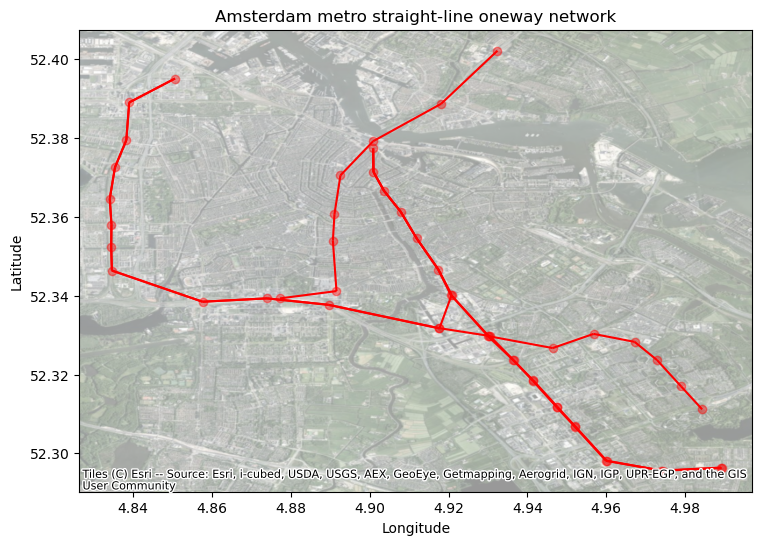

In [108]:
import contextily as ctx
city_sub_new_half_stations_straight_line_df = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_sub_new_half_edges_straight_line_df = gpd.GeoDataFrame(city_sub_new_half_edges_straight_line_df.copy(), geometry='geometry')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_half_stations_straight_line_df.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_half_edges_straight_line_df.plot(color='red', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro straight-line oneway network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

## Tram network

In [109]:
city_tram_new_half_order_route_dict = new_half_order_route_dict(city_tram_order_route_dict, city_tram_new_stations)
city_tram_new_half_stations_straight_line_df = new_half_stations_straight_line_df(city_tram_new_half_order_route_dict)
city_tram_new_half_edges_straight_line_df = new_edges_straight_line_df(city_tram_new_half_order_route_dict,14000)

In [110]:
city_tram_new_half_stations_straight_line_df

,geometry,id,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.9326128 52.3607965),2209,2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.9289422 52.3609314),2371,2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.9257029 52.3601162),2474,2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.9167422 52.3590732),2480,2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.9135923 52.3623479),2466,2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
234,POINT (4.8312794 52.3798913),2526,2,Burgemeester Fockstraat,4.831279,52.379891,"(4.8312794, 52.3798913)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
235,POINT (4.8258104 52.38075),2533,2,Burgemeester Eliasstraat,4.825810,52.380750,"(4.8258104, 52.38075)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
236,POINT (4.8211591 52.3808373),2528,2,Plein '40-'45,4.821159,52.380837,"(4.8211591, 52.3808373)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
237,POINT (4.8187509 52.3750672),2509,2,Burgemeester Roëllstraat,4.818751,52.375067,"(4.8187509, 52.3750672)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


In [111]:
city_tram_new_half_edges_straight_line_df

,geometry,from_id,to_id,route_name_list,distance,time,weights
0,"LINESTRING (4.9326128 52.3607965, 4.9289422 52...",2209,2371,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,409.348586,2,409
1,"LINESTRING (4.9289422 52.3609314, 4.9257029 52...",2371,2474,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,390.015159,2,390
2,"LINESTRING (4.9257029 52.3601162, 4.9167422 52...",2474,2480,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1015.456797,4,1015
3,"LINESTRING (4.9167422 52.3590732, 4.9135923 52...",2480,2466,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,692.298386,3,692
4,"LINESTRING (4.9135923 52.3623479, 4.9071213 52...",2466,2448,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,760.977104,3,761
...,...,...,...,...,...,...,...
23,"LINESTRING (4.8372054 52.378963, 4.8312794 52....",2529,2526,Tram 7: Amsterdam Azartplein => Amsterdam Slot...,681.05427,3,681
24,"LINESTRING (4.8312794 52.3798913, 4.8258104 52...",2526,2533,Tram 7: Amsterdam Azartplein => Amsterdam Slot...,628.623894,3,629
25,"LINESTRING (4.8258104 52.38075, 4.8211591 52.3...",2533,2528,Tram 7: Amsterdam Azartplein => Amsterdam Slot...,518.025056,2,518
26,"LINESTRING (4.8211591 52.3808373, 4.8187509 52...",2528,2509,Tram 7: Amsterdam Azartplein => Amsterdam Slot...,1085.828215,5,1086


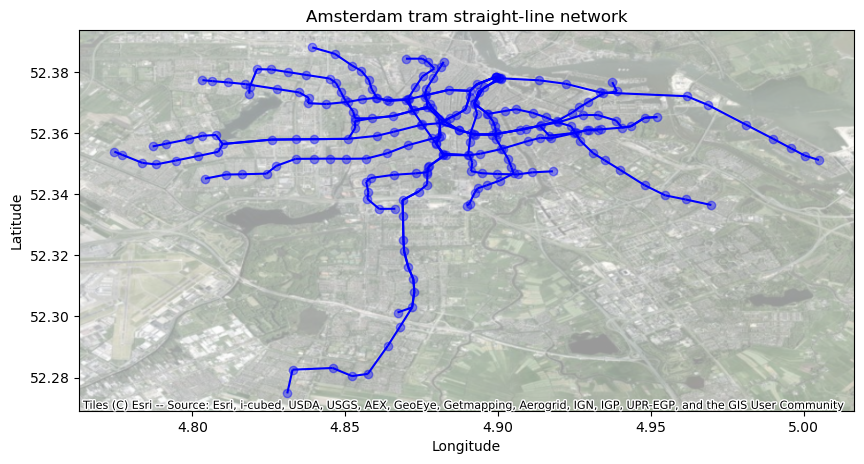

In [116]:
import contextily as ctx
city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_edges_straight_line_df.copy(), geometry='geometry')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_half_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

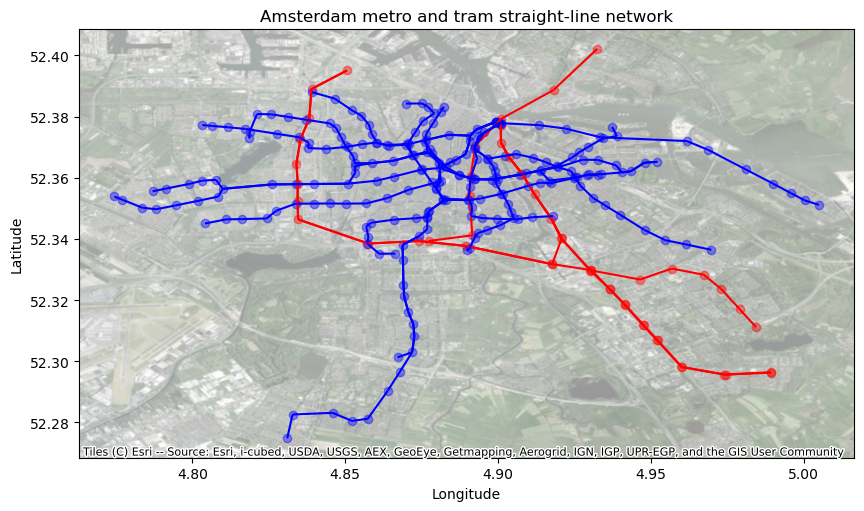

In [117]:
import contextily as ctx
city_sub_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_sub_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_edges_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_edges_straight_line_df.copy(), geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_half_stations_straight_line_gdf.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_half_edges_straight_line_gdf.plot(color='red', ax=ax, legend=True)
city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_half_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro and tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

## Connecting edges

In [120]:
def new_half_transfer_stations_name_list(city_sub_new_half_stations_straight_line_df):
    duplicate_names = city_sub_new_half_stations_straight_line_df['name'][city_sub_new_half_stations_straight_line_df['name'].duplicated()].drop_duplicates(ignore_index=True)
    duplicate_names_list = duplicate_names.tolist()
    return duplicate_names_list

In [121]:
connecting_sub_stations_name_list = new_half_transfer_stations_name_list(city_sub_new_half_stations_straight_line_df)
connecting_sub_stations_name_list

['Overamstel',
 'Centraal Station',
 'Zuid',
 'Spaklerweg',
 'Van der Madeweg',
 'Duivendrecht',
 'Strandvliet',
 'Bijlmer ArenA',
 'Bullewijk',
 'Holendrecht',
 'Reigersbos',
 'Gein']

In [124]:
id_new_edges_length = city_tram_edges['id'].iloc[-1] + 1
id_new_edges_length

3166

In [125]:
city_sub_new_connected_edges_straight_line, city_sub_new_connect_edges_dfs_straight_line = connected_all_edges_dataframe(connecting_sub_stations_name_list,city_sub_new_half_stations_straight_line_df,id_new_edges_length,city_sub_new_half_edges_straight_line_df)

In [126]:
city_sub_new_connected_edges_straight_line

,geometry,from_id,to_id,route_name_list,distance,time,weights,from_to,to_from,id
0,"LINESTRING (4.98916 52.29641, 4.97400 52.29564)",328,855,Metro 50: Gein => Isolatorweg,1693.527311,4,1694,NaN,NaN,NaN
1,"LINESTRING (4.97400 52.29564, 4.96013 52.29813)",855,854,Metro 50: Gein => Isolatorweg,1609.832708,4,1610,NaN,NaN,NaN
2,"LINESTRING (4.96013 52.29813, 4.95213 52.30687)",854,810,Metro 50: Gein => Isolatorweg,1822.740985,4,1823,NaN,NaN,NaN
3,"LINESTRING (4.95213 52.30687, 4.94762 52.31181)",810,809,Metro 50: Gein => Isolatorweg,1029.674063,2,1030,NaN,NaN,NaN
4,"LINESTRING (4.94762 52.31181, 4.94140 52.31861)",809,808,Metro 50: Gein => Isolatorweg,1419.649855,3,1420,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
94,"LINESTRING (4.95996 52.29809, 4.96013 52.29813)",853,854,NaN,20.341511,8.1,3317,"(853, 854)","(854, 853)",3189.0
95,"LINESTRING (4.97400 52.29564, 4.97438 52.29560)",855,144,NaN,42.619359,8.1,3317,"(855, 144)","(144, 855)",3190.0
96,"LINESTRING (4.97438 52.29560, 4.97400 52.29564)",144,855,NaN,42.619359,8.1,3317,"(144, 855)","(855, 144)",3191.0
97,"LINESTRING (4.98916 52.29641, 4.98930 52.29627)",328,323,NaN,29.060429,8.1,3317,"(328, 323)","(323, 328)",3192.0


In [127]:
connecting_tram_stations_name_list = new_half_transfer_stations_name_list(city_tram_new_half_stations_straight_line_df)
connecting_tram_stations_name_list

['Centraal Station',
 'Dam',
 'Bilderdijkstraat',
 'Hoekenes',
 'Baden Powellweg',
 'Jan van Galenstraat',
 'Admiraal De Ruijterweg',
 'Willem de Zwijgerlaan',
 'Elandsgracht',
 'Leidseplein',
 'Rijksmuseum',
 'Vijzelgracht',
 'Frederiksplein',
 'Weesperplein',
 "Korte 's-Gravesandestraat",
 'Johan Huizingalaan',
 'De Pijp',
 'Roelof Hartplein',
 'Amstelveenseweg',
 'Beukenweg',
 'Linnaeusstraat',
 'Dapperstraat',
 'Muiderpoortstation',
 'Maasstraat',
 'Waalstraat',
 'Victorieplein',
 'Prinsengracht',
 'Keizersgracht',
 'Rembrandtplein',
 'Rokin',
 'Stadionweg',
 'Gerrit van der Veenstraat',
 'Concertgebouw',
 'Museumplein',
 'Rietlandpark',
 'Alexanderplein',
 'Postjesweg',
 'Mercatorplein']

In [130]:
id_new_edges_length = int(city_sub_new_connected_edges_straight_line['id'].iloc[-1] + 1)
id_new_edges_length

3194

In [131]:
city_tram_new_connected_edges_straight_line, city_tram_new_connect_edges_dfs_straight_line = connected_all_edges_dataframe(connecting_tram_stations_name_list,city_tram_new_half_stations_straight_line_df,id_new_edges_length,city_tram_new_half_edges_straight_line_df)

In [132]:
city_tram_new_connected_edges_straight_line

,geometry,from_id,to_id,route_name_list,distance,time,weights,from_to,to_from,id
0,"LINESTRING (4.9326128 52.3607965, 4.9289422 52...",2209,2371,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,409.348586,2,409,NaN,NaN,NaN
1,"LINESTRING (4.9289422 52.3609314, 4.9257029 52...",2371,2474,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,390.015159,2,390,NaN,NaN,NaN
2,"LINESTRING (4.9257029 52.3601162, 4.9167422 52...",2474,2480,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1015.456797,4,1015,NaN,NaN,NaN
3,"LINESTRING (4.9167422 52.3590732, 4.9135923 52...",2480,2466,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,692.298386,3,692,NaN,NaN,NaN
4,"LINESTRING (4.9135923 52.3623479, 4.9071213 52...",2466,2448,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,760.977104,3,761,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
406,"LINESTRING (4.9192366 52.3638735, 4.9196097 52...",2465,2597,NaN,90.196585,14.1,3152,"(2465, 2597)","(2597, 2465)",3325.0
407,"LINESTRING (4.8531487 52.3638557, 4.8531786 52...",2696,2402,NaN,167.238821,14.1,3152,"(2696, 2402)","(2402, 2696)",3326.0
408,"LINESTRING (4.8531786 52.3647729, 4.8531487 52...",2402,2696,NaN,167.238821,14.1,3152,"(2402, 2696)","(2696, 2402)",3327.0
409,"LINESTRING (4.8507957 52.3701459, 4.8499792 52...",2507,2757,NaN,133.447752,14.1,3152,"(2507, 2757)","(2757, 2507)",3328.0


## Output results in QGIS and Excel

In [133]:
gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']]).to_file('city_sub_new_half_stations_straight_line_df0617.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_sub_new_connected_edges_straight_line[['geometry', 'from_id', 'to_id', 'route_name_list', 'distance', 'time', 'weights']]).to_file('city_sub_new_connected_edges_straight_line0617.GPKG',driver='GPKG')

In [134]:
gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']]).to_file('city_tram_new_half_stations_straight_line_df0617.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_tram_new_connected_edges_straight_line[['geometry', 'from_id', 'to_id', 'route_name_list', 'distance', 'time', 'weights']]).to_file('city_tram_new_connected_edges_straight_line0617.GPKG',driver='GPKG')

In [135]:
city_sub_new_half_stations_straight_line_df[['id','geo_x','geo_y','route_name_list','ref']].to_excel('city_sub_new_half_stations_straight_line_df0617.xlsx',header = True,index = False)

In [136]:
city_tram_new_half_stations_straight_line_df[['id','geo_x','geo_y','route_name_list','ref']].to_excel('city_tram_new_half_stations_straight_line_df0617.xlsx',header = True,index = False)

In [137]:
city_sub_new_connected_edges_straight_line[['from_id', 'to_id', 'route_name_list','distance', 'time']].to_excel('city_sub_new_connected_edges_straight_line0617.xlsx',header = True,index = False)

In [138]:
city_tram_new_connected_edges_straight_line[['from_id', 'to_id', 'route_name_list','distance', 'time']].to_excel('city_tram_new_connected_edges_straight_line0617.xlsx',header = True,index = False)

## Create Connect Edges in 300m for Metro and Tram

In [138]:
buffer_radius = 300

In [139]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_stations_straight_line_df,buffer_radius)
sub_new_stations_buffer_geometry

,id,geometry,name,geo_x,geo_y,coordinate_value,route_name_list,ref,transfer,route,buffer_geometry
0,328,POINT (555390.884 6853898.052),Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,"50, 54","50, 54",subway,"POLYGON ((555690.884 6853898.052, 555689.440 6..."
1,855,POINT (553703.169 6853757.861),Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,"50, 54","50, 54",subway,"POLYGON ((554003.169 6853757.861, 554001.725 6..."
2,854,POINT (552158.745 6854212.080),Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,"50, 54","50, 54",subway,"POLYGON ((552458.745 6854212.080, 552457.301 6..."
3,810,POINT (551268.501 6855802.630),Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,"50, 54","50, 54",subway,"POLYGON ((551568.501 6855802.630, 551567.056 6..."
4,809,POINT (550766.294 6856701.528),Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,"50, 54","50, 54",subway,"POLYGON ((551066.294 6856701.528, 551064.850 6..."
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (552961.225 6859717.546),Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,53,None,subway,"POLYGON ((553261.225 6859717.546, 553259.780 6..."
83,823,POINT (551775.962 6860088.944),Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,53,None,subway,"POLYGON ((552075.962 6860088.944, 552074.517 6..."
84,829,POINT (550617.070 6859438.093),Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,53,None,subway,"POLYGON ((550917.070 6859438.093, 550915.626 6..."
85,827,POINT (548836.771 6859966.806),Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,"50, 53, 54","50, 53, 54",subway,"POLYGON ((549136.771 6859966.806, 549135.327 6..."


In [140]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_stations_straight_line_df)
city_tram_new_stations_ftn

,id_tram,geometry_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,ref_tram,transfer_tram,route_tram
0,2209,POINT (549095.945 6865626.846),Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
1,2371,POINT (548687.336 6865651.437),Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
2,2474,POINT (548326.739 6865502.838),Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
3,2480,POINT (547329.238 6865312.719),Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
4,2466,POINT (546978.593 6865909.649),Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 19, 7","1, 19, 7",tram
...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (548393.230 6866966.046),Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,None,tram
414,2676,POINT (548760.528 6867340.750),Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,None,tram
415,2383,POINT (549343.063 6867853.627),Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,"26, 7","26, 7",tram
416,2619,POINT (549714.592 6867935.478),C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,None,tram


In [141]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram

,id,geometry,name,geo_x,geo_y,coordinate_value,route_name_list,ref,transfer,route,...,id_tram,geometry_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,ref_tram,transfer_tram,route_tram
0,819,POINT (547403.1208118391 6863046.022174509),Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,"51, 53, 54","51, 53, 54",subway,...,2101,POINT (547457.512 6863193.427),Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,12,None,tram
1,820,POINT (547411.0022317873 6863048.24534716),Amstelstation,4.917477,52.346648,"(4.9174767, 52.3466483)",Metro 51: Isolatorweg => Centraal Station,"51, 53, 54","51, 53, 54",subway,...,2101,POINT (547457.512 6863193.427),Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,12,None,tram
2,834,POINT (540744.7124492757 6861534.261047471),Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,"50, 51","50, 51",subway,...,2515,POINT (540706.441 6861549.328),Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,"2, 24","2, 24",tram
3,834,POINT (540744.7124492757 6861534.261047471),Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,"50, 51","50, 51",subway,...,2516,POINT (540712.274 6861514.766),Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,"2, 24","2, 24",tram
4,835,POINT (540742.3190802236 6861559.002901717),Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,"50, 51","50, 51",subway,...,2515,POINT (540706.441 6861549.328),Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,"2, 24","2, 24",tram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,138,POINT (546346.9548790398 6865723.4216876915),Weesperplein,4.907918,52.361326,"(4.9079182, 52.3613263)",Metro 51: Isolatorweg => Centraal Station,"51, 53, 54","51, 53, 54",subway,...,2448,POINT (546258.244 6865664.324),Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 19, 7","1, 19, 7",tram
110,460,POINT (546339.0511951934 6865720.341024122),Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,"51, 53, 54","51, 53, 54",subway,...,2449,POINT (546485.013 6865737.622),Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,"1, 19, 7","1, 19, 7",tram
111,460,POINT (546339.0511951934 6865720.341024122),Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,"51, 53, 54","51, 53, 54",subway,...,2448,POINT (546258.244 6865664.324),Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 19, 7","1, 19, 7",tram
112,840,POINT (542567.1127011032 6861713.358806675),Zuid,4.873963,52.339322,"(4.8739633, 52.3393223)",Metro 50: Gein => Isolatorweg,"50, 51, 52","50, 51, 52",subway,...,1068,POINT (542480.462 6861985.602),Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,"25, 5","25, 5",tram


In [142]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

,name,name_tram
0,Amstelstation,Amstelstation
1,Amstelstation,Amstelstation
2,Amstelveenseweg,Amstelveenseweg
3,Amstelveenseweg,Amstelveenseweg
4,Amstelveenseweg,Amstelveenseweg
...,...,...
109,Weesperplein,Weesperplein
110,Weesperplein,Weesperplein
111,Weesperplein,Weesperplein
112,Zuid,Station Zuid


In [143]:
# transfer_stations_sub_to_tram.to_excel('transfer_stations_sub_to_tram_0426.xlsx',header = True,index = False)

In [144]:
connect_edges_sub_to_tram = create_connect_edges(transfer_stations_sub_to_tram)
connect_edges_sub_to_tram

ValueError: could not convert string to float: 'M'

In [ ]:
start_id_for_connect_edges_sub_to_tram = int(city_tram_new_connected_edges_straight_line['id'].iloc[-1] + 1)
start_id_for_connect_edges_sub_to_tram

In [ ]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram))]
# connect_edges_sub_to_tram_id_list

In [ ]:
connect_edges_sub_to_tram['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + city_tram_new_edges.sort_values(by='time').time.iloc[-1] + 1

In [ ]:
connect_edges_sub_to_tram

In [130]:
# city_sub_new_stations

In [131]:
# city_tram_new_stations